In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

In [2]:
#function for Fvalues
potential_e = 0.01
potential_mu = -0.01
def Fvv_values(p_1, p_2, p_3, p_4):
    f1 = f(p_1, potential_e)
    g1 = g(p_1, potential_mu)
    f2 = f(p_2, potential_e)
    g2 = g(p_2, potential_mu)
    f3 = f(p_3, potential_e)
    g3 = g(p_3, potential_mu)
    f4 = f(p_4, potential_e)
    g4 = g(p_4, potential_mu)
    
    T1 = 2*f3*f4*(1-f2)*(1-f1) + f3*g4*(1-g2)*(1-f1) + 2*g3*g4*(1-g2)*(1-g1) + g3*f4*(1-f2)*(1-g1)
    T2 = 2*(1-f3)*(1-f4)*f2*f1 + (1-f3)*(1-g4)*g2*f1 + 2*(1-g3)*(1-g4)*g2*g1 + (1-g3)*(1-f4)*f2*g1
    
    return T1-T2

def Fvvbar_values(p_1, p_2, p_3, p_4):
    f1 = f(p_1, potential_e)
    g1 = g(p_1, potential_mu)
    f2 = f(p_2, -potential_e)
    g2 = g(p_2, -potential_mu)
    f3 = f(p_3, -potential_e)
    g3 = g(p_3, -potential_mu)
    f4 = f(p_4, potential_e)
    g4 = g(p_4, potential_mu)
    
    T1a = 2*(1-f1)*f4*f3*(1-f2) + (1-f1)*f4*g3*(1-g2) + 2*(1-g1)*g4*g3*(1-g2) + (1-g1)*g4*f3*(1-f2)
    T1b = 2*(1-f1)*(1-f2)*f3*f4 + (1-f1)*(1-f2)*g3*g4 + 2*(1-g1)*(1-g2)*g3*g4 + (1-g1)*(1-g2)*f3*f4
    
    T2a = 2*f1*(1-f4)*(1-f3)*f2 + f1*(1-f4)*(1-g3)*g2 + 2*g1*(1-g4)*(1-g3)*g2 + g1*(1-g4)*(1-f3)*f2
    T2b = 2*f1*f2*(1-f3)*(1-f4) + f1*f2*(1-g3)*(1-g4) + 2*g1*g2*(1-g3)*(1-g4) + g1*g2*(1-f3)*(1-f4)
    
    return T1a+T1b-T2a-T2b

In [3]:
#function for J1, J2, J3
def J1(p1, p2, p3):
    return 16./15 * p3**3 * (10 * (p1+p2)**2 - 15 * (p1+p2) * p3 + 6 * p3**2)

def J2(p1, p2):
    return 16./15 * p2**3 * (10 * p1**2 + 5 * p1*p2 + p2**2)
    
def J3(p1, p2, p3):
    return 16./15 * ((p1+p2)**5 - 10 * (p1+p2)**2 * p3**3 + 15 * (p1+p2) * p3**4 - 6 * p3**5)

def K1(p1, p3):
    return 16./15 * p3**3 * (10 * p1**2 -  5* p1 * p3 + p3**2)

def K2(p1, p2, p3):
    return 16./15 * p2**3 * (10 * (p1-p3)**2 + 15 * (p1-p3) * p2 + 6 * p2**2)

def K3(p1, p2, p3):
    return 16./15 * ((p1-p3)**2 * p2**3 + 15 * (p1-p3) * p2**4 + 6 * p2**5)

In [4]:
def f(energy, potential):
    return 1 / (math.exp(energy + potential) + 1)
    
    
def g(energy, potential):
    return 1 / (math.exp(energy + potential)+1)

In [5]:
def inner_integral(p1, p2):
    sum = 0
    
    length = 10000
    values = np.zeros(length)

    p3_vals = np.linspace(xmin, eps[p2]+eps[p1], length)
    if(p2<p1):
        for p3 in range(length):
            if(eps[p1]+eps[p2]-p3_vals[p3]>=0):

                if(p3<p2):
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J1(eps[p1], eps[p2], p3_vals[p3]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K1(eps[p1], p3_vals[p3])
                elif(p3<p1):
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J2(eps[p1], eps[p2]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K2(eps[p1], eps[p2], p3_vals[p3])
                else:
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J3(eps[p1], eps[p2], p3_vals[p3]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K3(eps[p1], eps[p2], p3_vals[p3])
                    
    else:
        for p3 in range(length):
            if(eps[p1]+eps[p2]-p3_vals[p3]>=0):
                if(p3<p1):
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J1(eps[p1], eps[p2], p3_vals[p3]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K1(eps[p1], p3_vals[p3])
                elif(p3<p2):
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J2(eps[p2], eps[p1]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K1(p3_vals[p3], eps[p1])
                else:
                    values[p3] = Fvv_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * J3(eps[p1], eps[p2], p3_vals[p3]) + Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3]) * K3(eps[p1], eps[p2], p3_vals[p3])

    return scipy.integrate.trapezoid(values, p3_vals)

In [6]:
xmin = 0
xmax = 10
numlin = 201
p1 = 75

eps = np.linspace(xmin, xmax, numlin)

In [7]:
results = np.zeros(numlin)
for i in range(numlin):
    results[i] = inner_integral(p1, i)

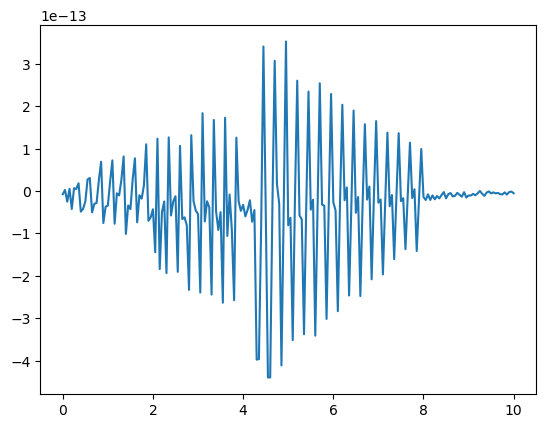

In [8]:
plt.figure()
plt.plot(eps, results)
plt.show()

In [213]:
p2=200

length = 100
values = np.zeros(length)

p3_vals = np.linspace(xmin, eps[p2]+eps[p1], length)

for p3 in range(length):
    if(eps[p1]+eps[p2]-p3_vals[p3]>=0):

        values[p3] = Fvvbar_values(eps[p1], eps[p2], p3_vals[p3], eps[p1]+eps[p2]-p3_vals[p3])

<function matplotlib.pyplot.show(close=None, block=None)>

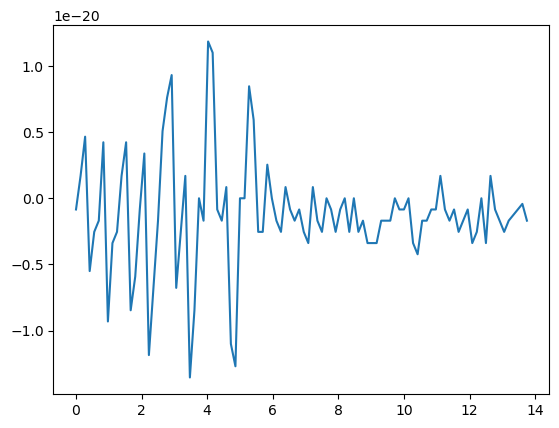

In [214]:
plt.figure
plt.plot(p3_vals, values)
plt.show